In [82]:
import pandas as pd
import os
import sklearn
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
import seaborn as sns

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')

In [ ]:
df.head()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())

dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  7043
nNumber of features: 21
nData Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
nMissing values: 11
nUnique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


# **Extracting Important Features Using Feature Importance**

Separating numerical and categorical features

In [12]:
df.drop(["customerID"],axis=1,inplace = True)

In [13]:
numerical_features = df.select_dtypes(include=['int64','float64'])
categorical_features = df.select_dtypes(include=['object'])

Imputation

In [14]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
numerical_features_imputed = knn_imputer.fit_transform(numerical_features)


In [15]:
numerical_features_imputed_df = pd.DataFrame(numerical_features_imputed,columns=numerical_features.columns)

In [16]:
numerical_features_imputed_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,29.85,29.85
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15
3,0.0,45.0,42.30,1840.75
4,0.0,2.0,70.70,151.65
...,...,...,...,...
7038,0.0,24.0,84.80,1990.50
7039,0.0,72.0,103.20,7362.90
7040,0.0,11.0,29.60,346.45
7041,1.0,4.0,74.40,306.60


In [17]:
categorical_features_imputed = categorical_features.ffill()

In [18]:
categorical_features_imputed_df = pd.DataFrame(categorical_features_imputed, columns =categorical_features.columns)

Encoding

In [19]:
categorical_features_imputed_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [20]:
# Create a new DataFrame for label-encoded features
label_encoded_features = pd.DataFrame()

In [21]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = ['gender', 'Partner', 'Dependents','PhoneService','PaperlessBilling','Churn']

for col in columns_to_encode:
   label_encoded_features[col] = label_encoder.fit_transform(categorical_features_imputed_df[col])



In [22]:
label_encoded_features

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1
...,...,...,...,...,...,...
7038,1,1,1,1,1,0
7039,0,1,1,1,1,0
7040,0,1,1,0,1,0
7041,1,1,0,1,1,1


In [23]:
columns_to_drop = label_encoded_features.columns
categorical_features_imputed_df = categorical_features_imputed_df.drop(columns=columns_to_drop)

In [24]:
categorical_features_imputed_df

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check
1,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check
2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check
3,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic)
4,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
...,...,...,...,...,...,...,...,...,...,...
7038,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check
7039,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic)
7040,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check
7041,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Mailed check


In [25]:
One_Hot_encoded_features= pd.get_dummies(categorical_features_imputed_df)


In [26]:
One_Hot_encoded_features = One_Hot_encoded_features.groupby(axis=1, level=0).apply(lambda x: x.max(axis=1))




In [27]:
One_Hot_encoded_features


,Contract_Month-to-month,Contract_One year,Contract_Two year,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,...,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,1,1,0,0,1,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,1,0,0,1,0,0,1,...,1,1,0,0,1,0,0,1,0,0
3,0,1,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,1,0,0,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
7039,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
7040,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
7041,1,0,0,1,0,0,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0


In [28]:
categorical_features_imputed_df_encoded = pd.concat([label_encoded_features, One_Hot_encoded_features], axis = 1)

In [29]:
categorical_features_imputed_df_encoded

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,DeviceProtection_No,...,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0,1,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,1,0,0,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,1,1,1,1,0,0,1,...,1,1,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,0,0,0,1,1,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
7039,0,1,1,1,1,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
7040,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
7041,1,1,0,1,1,1,1,0,0,1,...,1,1,0,0,1,0,0,1,0,0


In [30]:
new_df = pd.concat([numerical_features_imputed_df, categorical_features_imputed_df_encoded], axis=1)

In [31]:
new_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0.0,1.0,29.85,29.85,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0.0,34.0,56.95,1889.50,1,0,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0
2,0.0,2.0,53.85,108.15,1,0,0,1,1,1,...,1,1,0,0,1,0,0,1,0,0
3,0.0,45.0,42.30,1840.75,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,0.0,2.0,70.70,151.65,0,0,0,1,1,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,24.0,84.80,1990.50,1,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
7039,0.0,72.0,103.20,7362.90,0,1,1,1,1,0,...,0,0,0,1,0,0,1,1,0,0
7040,0.0,11.0,29.60,346.45,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
7041,1.0,4.0,74.40,306.60,1,1,0,1,1,1,...,1,1,0,0,1,0,0,1,0,0


In [32]:
y = new_df['Churn']
X = new_df.drop('Churn', axis=1)


In [33]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling,Contract_Month-to-month,...,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0.0,1.0,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
1,0.0,34.0,56.95,1889.50,1,0,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0
2,0.0,2.0,53.85,108.15,1,0,0,1,1,1,...,1,1,0,0,1,0,0,1,0,0
3,0.0,45.0,42.30,1840.75,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,0.0,2.0,70.70,151.65,0,0,0,1,1,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,24.0,84.80,1990.50,1,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
7039,0.0,72.0,103.20,7362.90,0,1,1,1,1,0,...,0,0,0,1,0,0,1,1,0,0
7040,0.0,11.0,29.60,346.45,0,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7041,1.0,4.0,74.40,306.60,1,1,0,1,1,1,...,1,1,0,0,1,0,0,1,0,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
import pickle
pickle_filename = '/content/drive/My Drive/Colab Notebooks/scaler.pkl'
with open(pickle_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


In [39]:
rfc.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [40]:
feature_importances = rfc.feature_importances_

In [41]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [42]:
feature_importance_df

,Feature,Importance
3,TotalCharges,0.170663
2,MonthlyCharges,0.148255
1,tenure,0.144935
9,Contract_Month-to-month,0.056858
24,OnlineSecurity_No,0.030844
4,gender,0.027885
29,PaymentMethod_Electronic check,0.026881
37,TechSupport_No,0.026470
8,PaperlessBilling,0.025793
5,Partner,0.024193


## **## Exploratory Data Analysis**

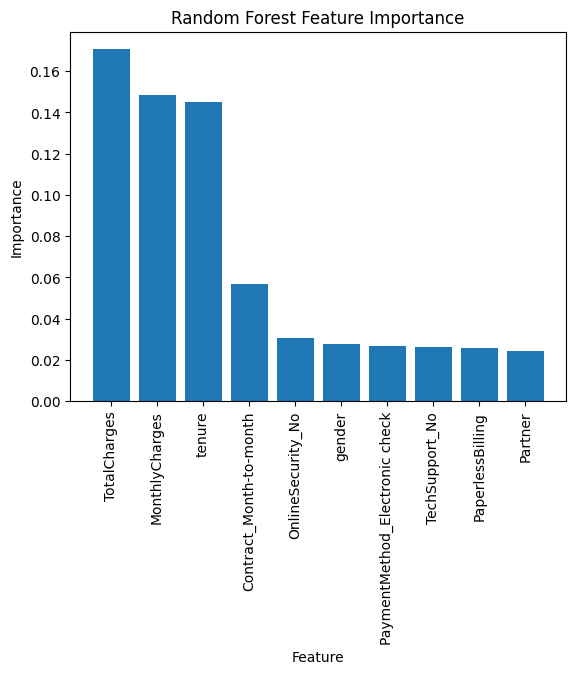

In [43]:
plt.bar(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation='vertical')
plt.show()

## This bar chart illustrates the top ten most influential features derived from a feature importance analysis. These features play a crucial role in determining the performance of the model. The importance values, presented on the y-axis, quantify the impact of each feature on the model's predictions. Understanding and prioritizing these features can provide valuable insights into the factors that significantly contribute to the model's accuracy and effectiveness.

In [44]:
top10_features = feature_importance_df.nlargest(10, 'Importance')

In [45]:
top10_features

,Feature,Importance
3,TotalCharges,0.170663
2,MonthlyCharges,0.148255
1,tenure,0.144935
9,Contract_Month-to-month,0.056858
24,OnlineSecurity_No,0.030844
4,gender,0.027885
29,PaymentMethod_Electronic check,0.026881
37,TechSupport_No,0.026470
8,PaperlessBilling,0.025793
5,Partner,0.024193


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

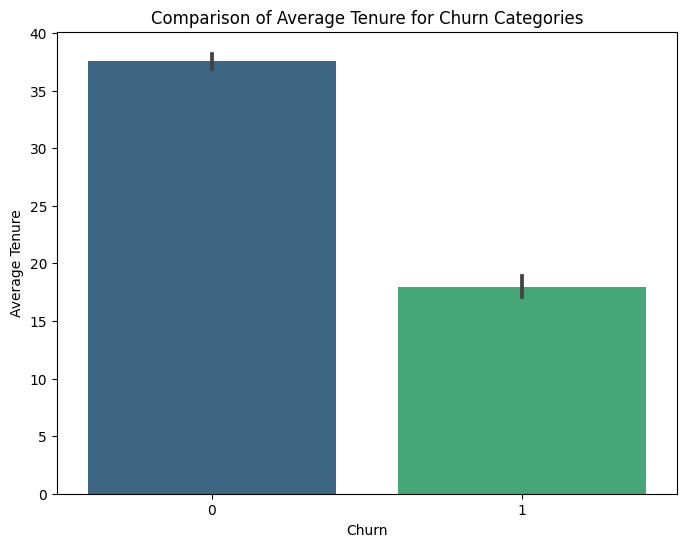

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='tenure', data=new_df, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Average Tenure')
plt.title('Comparison of Average Tenure for Churn Categories')
plt.show()

## The chart reveals a clear trend indicating that customer tenure is inversely related to churn. Specifically, as tenure increases, the likelihood of churn decreases, and conversely, as tenure decreases, the likelihood of churn increases. In other words, customers who have been with the company for a longer duration are less likely to churn, while those with shorter tenures exhibit a higher propensity to churn.

## This insight underscores the importance of customer loyalty and long-term relationships in reducing churn rates. It suggests that establishing strategies to retain customers over an extended period can be effective in mitigating churn.

In [48]:
import plotly.express as px

In [49]:
target_instance = new_df["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

## The pie chart illustrates the distribution of churn categories within the dataset. Approximately 73.5% of the entries correspond to "No Churn," representing 5,174 instances, while around 26.5% correspond to "Churn," representing 1,869 instances. This breakdown provides a clear overview of the imbalance between the two classes in the dataset, with a majority of instances falling into the "No Churn" category. Understanding the class distribution is crucial when developing and evaluating machine learning models, as imbalances may impact the model's performance and interpretation

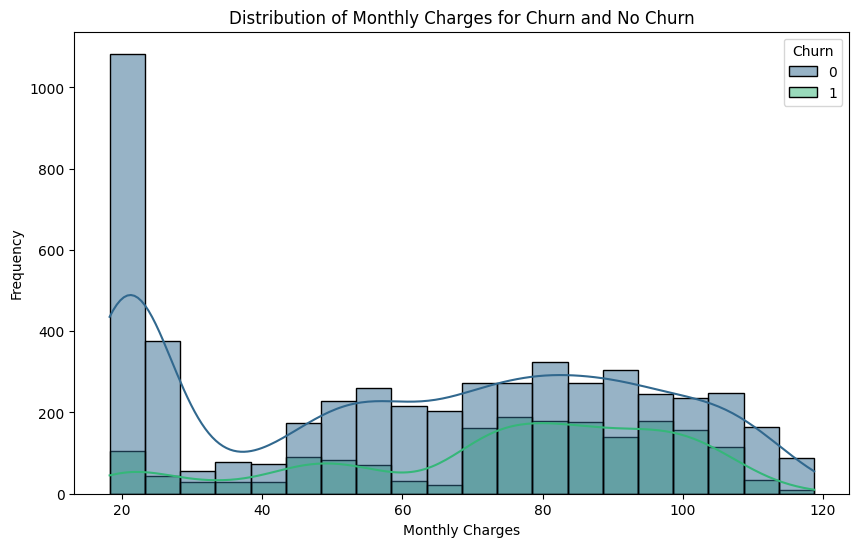

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data=new_df, x='MonthlyCharges', hue='Churn', bins=20, kde=True, palette='viridis')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges for Churn and No Churn')
plt.show()

## The chart highlights a pattern suggesting that customers with higher monthly charges are more likely to churn. This insight indicates a potential correlation between the cost of services (reflected in monthly charges) and customer churn. It implies that customers facing higher expenses may be more sensitive to price changes or may have specific expectations related to service quality that, if not met, contribute to a higher likelihood of churning.

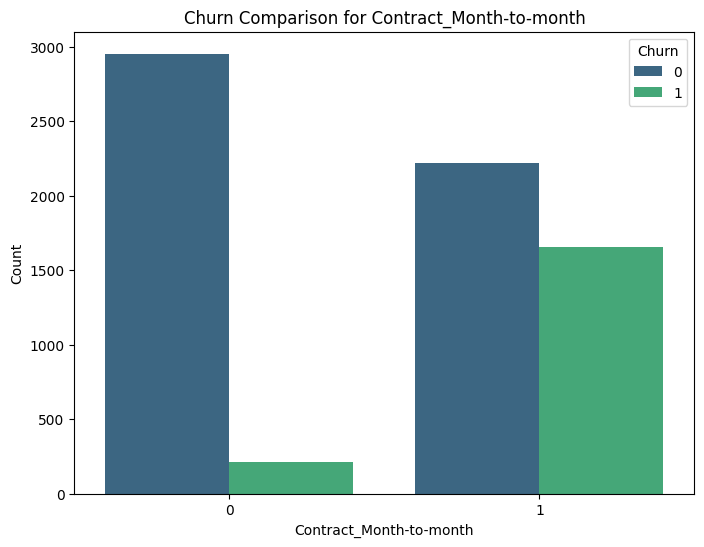

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract_Month-to-month', hue='Churn', data=new_df, palette='viridis')
plt.xlabel('Contract_Month-to-month')
plt.ylabel('Count')
plt.title('Churn Comparison for Contract_Month-to-month')
plt.show()

## From the chart, we observe that the number of customers who have a month-to-month contract and churn (represented by '1') is higher compared to those who have a different type of contract and do not churn (represented by '0'). In other words, a significant proportion of customers with a month-to-month contract tend to churn, as indicated by the higher count in the 'Churn' category ('1') for the 'Contract_Month-to-month' feature. The contrasting lower count in the 'No Churn' category ('0') suggests that customers with a different type of contract are less likely to churn.


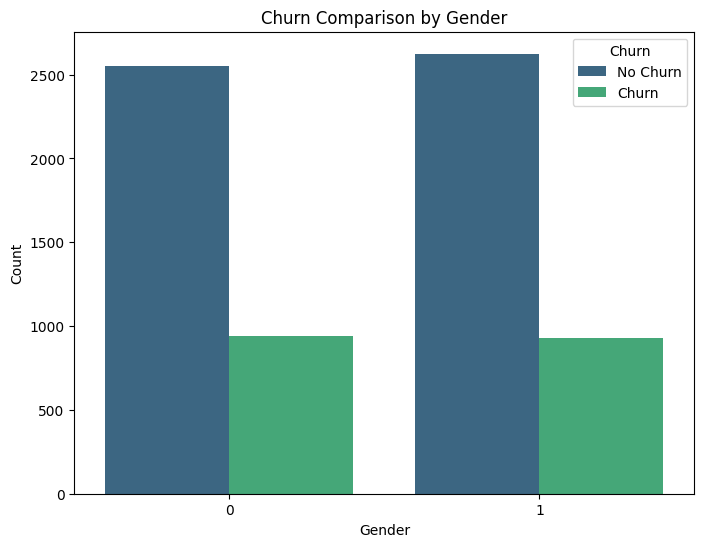

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=new_df, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Comparison by Gender')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

## The chart indicates that gender doesn't seem to be a significant factor influencing customer churn, as the distribution of churn and no-churn instances appears similar for both males and females. The comparable counts suggest that, at least based on the available data, gender doesn't exhibit a pronounced impact on the likelihood of customers churning. This insight implies that other factors, such as contract type, tenure, or service-related features, might play a more substantial role in predicting and understanding customer churn in this dataset.

<Figure size 800x600 with 0 Axes>

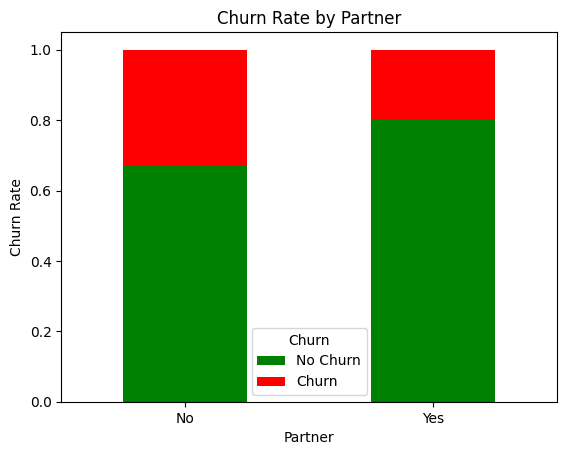

In [85]:
# Calculate churn rates for each category of the "Partner" variable
churn_rate_by_partner = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack().fillna(0)

# Plot the bar chart
plt.figure(figsize=(8, 6))
churn_rate_by_partner.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Churn Rate by Partner')
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.xticks(rotation='horizontal')
plt.show()

## From the provided chart, it appears that customers with partners are less likely to churn compared to those without partners. This visual representation can be helpful in understanding the relationship between having a partner and the likelihood of churn. It suggests that there might be some positive influence or stability associated with having a partner that contributes to a lower churn rate. This insight can be valuable for the telecom company in tailoring strategies to retain customers, especially those without partners, by understanding and addressing their specific needs or concerns

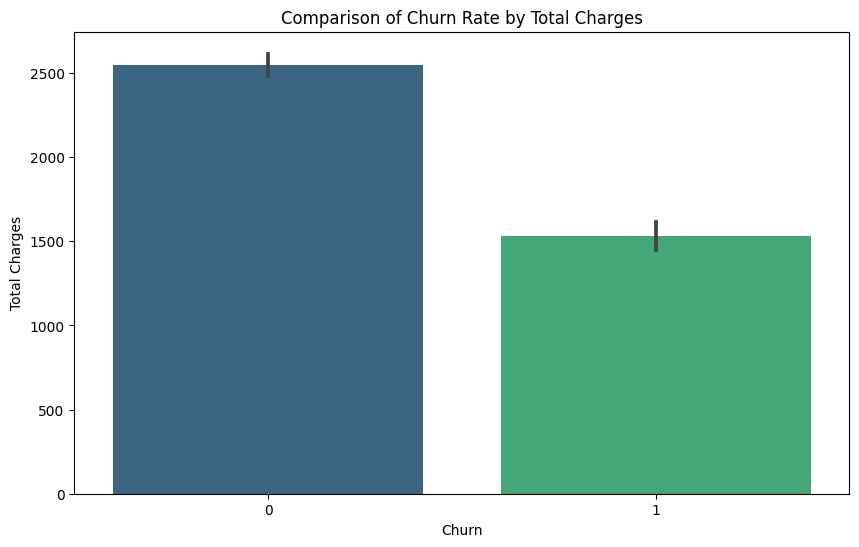

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='TotalCharges', data=new_df, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Comparison of Churn Rate by Total Charges')
plt.show()

## The likelihood of customer churn tends to decrease as the Total Charges increase. In other words, customers with higher Total Charges are less likely to churn

In [52]:
#X = X[top10_features.index]
#X = X.iloc[:, top10_features]
top10_features_names = top10_features['Feature'].tolist()
X = new_df[top10_features_names]


In [53]:
X

,TotalCharges,MonthlyCharges,tenure,Contract_Month-to-month,OnlineSecurity_No,gender,PaymentMethod_Electronic check,TechSupport_No,PaperlessBilling,Partner
0,29.85,29.85,1.0,1,1,0,1,1,1,1
1,1889.50,56.95,34.0,0,0,1,0,1,0,0
2,108.15,53.85,2.0,1,0,1,0,1,1,0
3,1840.75,42.30,45.0,0,0,1,0,0,0,0
4,151.65,70.70,2.0,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,24.0,0,0,1,0,0,1,1
7039,7362.90,103.20,72.0,0,1,0,0,1,1,1
7040,346.45,29.60,11.0,1,0,0,1,1,1,1
7041,306.60,74.40,4.0,1,1,1,0,1,1,1


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
import pickle
# Specify the filename for the pickle file
pickle_filename = '/content/drive/My Drive/Colab Notebooks/scaler.pkl'

# Save the model to a pickle file
with open(pickle_filename, 'wb') as file:
    pickle.dump(scaler, file)


In [62]:
pip install scikeras

## **Training a Multi-Layer Perceptron model using the Functional API cross validation and GridSearchCV**

In [63]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier, KerasRegressor



In [64]:
inputs = Input(shape=(X_train.shape[1],))
hidden1 = Dense(units=64, activation='relu')(inputs)
hidden2 = Dense(units=32, activation='relu')(hidden1)
hidden3 = Dense(24, activation='relu')(hidden2)
hidden4 = Dense(12, activation='relu')(hidden3)
output = Dense(units=1, activation='sigmoid')(hidden4)

model = Model(inputs=inputs, outputs=output)

In [65]:
custom_optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
177/177 [==============================] - 3s 7ms/step - loss: 2.0952 - accuracy: 0.6963 - val_loss: 0.7539 - val_accuracy: 0.7551
Epoch 2/50
177/177 [==============================] - 1s 6ms/step - loss: 1.0057 - accuracy: 0.7187 - val_loss: 0.8045 - val_accuracy: 0.7878
Epoch 3/50
177/177 [==============================] - 2s 10ms/step - loss: 1.0137 - accuracy: 0.7240 - val_loss: 0.9319 - val_accuracy: 0.7864
Epoch 4/50
177/177 [==============================] - 3s 16ms/step - loss: 0.6969 - accuracy: 0.7488 - val_loss: 0.7395 - val_accuracy: 0.6196
Epoch 5/50
177/177 [==============================] - 2s 13ms/step - loss: 0.7905 - accuracy: 0.7323 - val_loss: 0.4759 - val_accuracy: 0.7906
Epoch 6/50
177/177 [==============================] - 2s 11ms/step - loss: 0.5966 - accuracy: 0.7510 - val_loss: 0.5516 - val_accuracy: 0.7921
Epoch 7/50
177/177 [==============================] - 2s 9ms/step - loss: 0.5428 - accuracy: 0.7670 - val_loss: 0.4439 - val_accuracy: 0.7864
Ep

In [66]:
#accuracy = model.evaluate(X_test,y_test)
#accuracy*100

In [67]:
# Wrap Keras model as a scikit-learn compatible classifier
keras_clf = KerasClassifier(build_fn=model, epochs= 10, batch_size=32, verbose=0)


In [68]:
# Define hyperparameter grid for GridSearchCV
#param_grid = {
   # 'optimizer': ['adam', 'rmsprop'],

#}
param_grid = {

    "loss": ["binary_crossentropy"],
    "optimizer": ["adam", "sgd"],
    "optimizer__learning_rate": [0.0001, 0.001, 0.1],

}

In [69]:
# Use StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [70]:
# Initialize GridSearchCV
grid_search = GridSearchCV(keras_clf, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

In [71]:
# Fit the model with cross-validation
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KerasClassifier(batch_size=32, build_fn=<keras.src.engine.functional.Functional object at 0x79dcb121a320>, epochs=10, verbose=0),
             n_jobs=-1,
             param_grid={'loss': ['binary_crossentropy'],
                         'optimizer': ['adam', 'sgd'],
                         'optimizer__learning_rate': [0.0001, 0.001, 0.1]},
             scoring='accuracy')

In [72]:
print(grid_search.cv_results_)

{'mean_fit_time': array([13.84544821, 13.75122833, 12.99696851, 13.33825376, 18.02000177,
       14.49531379]), 'std_fit_time': array([5.01218175, 5.02260546, 3.6242432 , 3.967434  , 3.83689609,
       5.37521386]), 'mean_score_time': array([0.60630176, 0.52580011, 0.5913641 , 0.5305675 , 0.53259354,
       0.50163279]), 'std_score_time': array([0.31292658, 0.27225956, 0.29318103, 0.31284663, 0.36334513,
       0.28702686]), 'param_loss': masked_array(data=['binary_crossentropy', 'binary_crossentropy',
                   'binary_crossentropy', 'binary_crossentropy',
                   'binary_crossentropy', 'binary_crossentropy'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_optimizer': masked_array(data=['adam', 'adam', 'adam', 'sgd', 'sgd', 'sgd'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_optimizer__learning_rate': masked_array(data=[

In [73]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

In [74]:
keras_model = best_model.build_fn

# Save the Keras model to an HDF5 file
h5_filename = '/content/drive/My Drive/Colab Notebooks/best_model.h5'
keras_model.save(h5_filename)


In [75]:
# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)

In [76]:
from sklearn.metrics import roc_auc_score


## **Evaluation**

In [77]:
# Predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# AUC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)




Accuracy: 0.7920511000709723
AUC Score: 0.831721562619686


In [78]:
from keras.models import load_model
best_model = load_model('/content/drive/My Drive/Colab Notebooks/best_model.h5')

In [79]:
test = best_model.predict(X_test)

45/45 [==============================] - 0s 2ms/step


In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

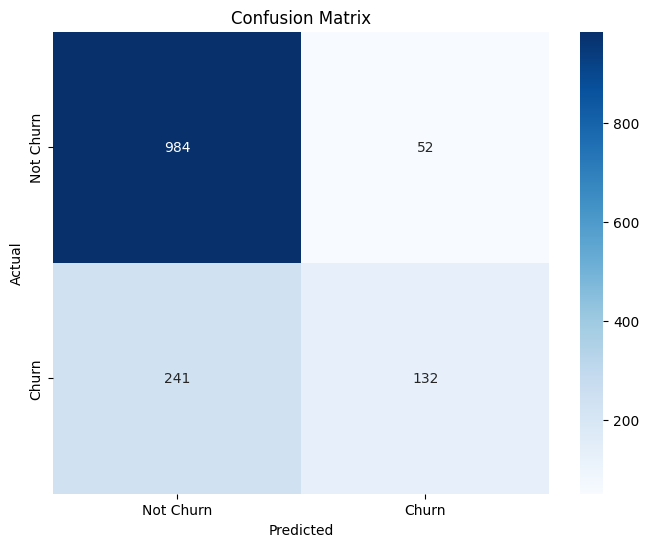

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1036
           1       0.72      0.35      0.47       373

    accuracy                           0.79      1409
   macro avg       0.76      0.65      0.67      1409
weighted avg       0.78      0.79      0.77      1409



In [81]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))